# Task #2

Complete the following 10 exercises

### Setting up dependencies

In [9]:
!pip install numpy matplotlib

In [59]:
import numpy as np
import matplotlib.pyplot as plt

### To prove that any rotational-only transformation matrix has a determinant of 1

Let's consider a few key points about rotation matrices and determinants

#### **Properties of Rotation Matrices:**

- **Orthogonality:** A rotation matrix $R$ in $R^n$ is orthogonal, meaning $R^T R = I$, where $R^T$ is the transpose of $R$ and $I$ is the identity matrix
- **Preservation of Norms:** Rotations preserve the lengths of vectors and the angles between them

#### **Determinant and Orthogonal Matrices:**

For an orthogonal matrix $R$:

- $R^T R = I$
- $det(R^T) det(R) = det(I)$
- Since $det(I) = 1$, we have $det(R^T) det(R) = 1$


For an orthogonal matrix $R$, $det(R^T) = det(R)$. Therefore, $(det(R))² = 1$, implying $det(R) = \pm 1$

**Positive Determinant for Rotations:**

Rotation matrices not only preserve lengths and angles but also orientation. A matrix with $det(R) = −1$ would invert the orientation, which is characteristic of a reflection, not a pure rotation. Therefore, for a pure rotation matrix, the determinant must be $1$

**Conclusion:**

Any rotational-only transformation matrix $R$ has a determinant of $1$

**Verification in Python:**

Let's verify this with a simple example in Python using a $2D$ rotation matrix.

In [7]:
# Define a 2D rotation matrix for an angle theta
theta = np.pi / 4  # 45 degrees
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

# Calculate the determinant
det_R = np.linalg.det(R)

print(det_R)


1.0


### Try the intuition of the determinant with different transformations in Jupyter Notebooks. Including the "cat/fun" transformation

Let's set up our environment by importing necessary libraries and creating a function to visualize transformations

In [69]:
def plot_transformation(T, ax):
    square = np.array([
        [0, 0],
        [1, 0],
        [1, 1],
        [0, 1],
        [0, 0]
    ])
    
    transformed_square = square @ T.T
    
    # Plot original and transformed squares
    ax.plot(square[:, 0], square[:, 1], 'b-', label='Original')
    ax.plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', label='Transformed')
    ax.legend()
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.grid()
    ax.set_aspect('equal')

    det = np.linalg.det(T)
    ax.set_title(f'Determinant: {det:.2f}')

##### Transformations that do not change the size

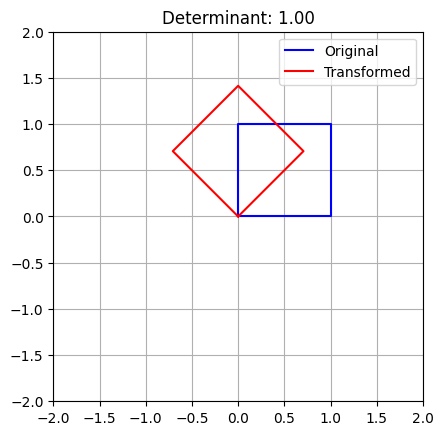

In [68]:
theta = np.pi / 4  # 45 degrees
rotation = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

fig, ax = plt.subplots()
plot_transformation(rotation, ax)
plt.show()

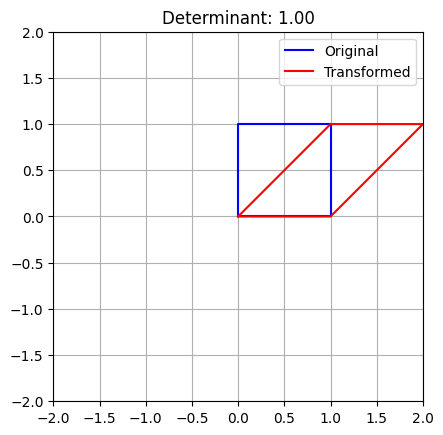

In [67]:
shearing = np.array(
  [
    [1, 1],
    [0, 1]
  ]
)

fig, ax = plt.subplots()
plot_transformation(shearing, ax)
plt.show()

##### Transformations that change the size

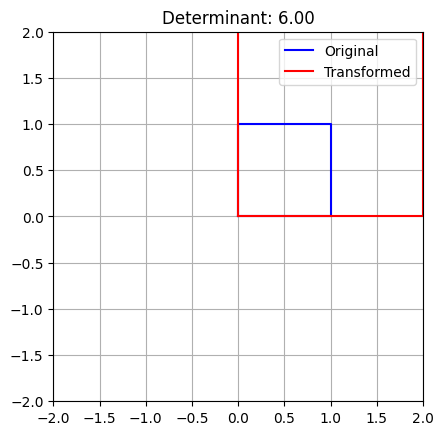

In [66]:
scaling = np.array(
  [
    [2, 0],
    [0, 3]
  ]
)

fig, ax = plt.subplots()
plot_transformation(scaling, ax)
plt.show()

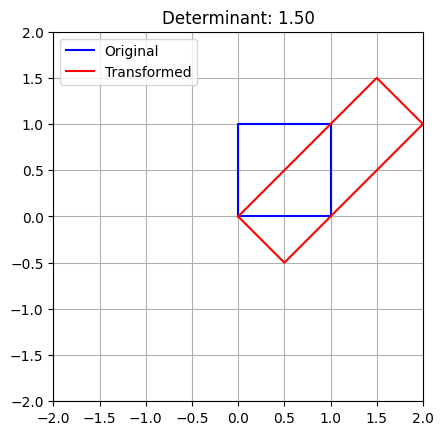

In [65]:
custom = np.array(
  [
    [0.5, 1.5],
    [-0.5, 1.5]
  ]
)

fig, ax = plt.subplots()
plot_transformation(custom, ax)
plt.show()

### Provide a transformation that increases the area of the transformation space by "K" (Choose whatever "K" you want except 1), then compute the area in both spaces and confirm the concept

Let's consider a scaling transformation that increases the area of the transformation space by a factor of $K$. For simplicity, let's choose $K = 4$. This means our scaling transformation matrix should scale the area of any shape by a factor of $4$

#### Scaling Transformation Matrix

A scaling matrix that scales the area by $K$ can be defined as:

$$
S =
\begin{bmatrix}
  \sqrt{K} & 0\\
  0 & \sqrt{K}
\end{bmatrix}
$$

For $K = 4$, this becomes:

$$
S =
\begin{bmatrix}
  2 & 0\\
  0 & 2
\end{bmatrix}
$$

#### Visualization and Calculation

Let's visualize the transformation and compute the area before and after the transformation to confirm the concept.

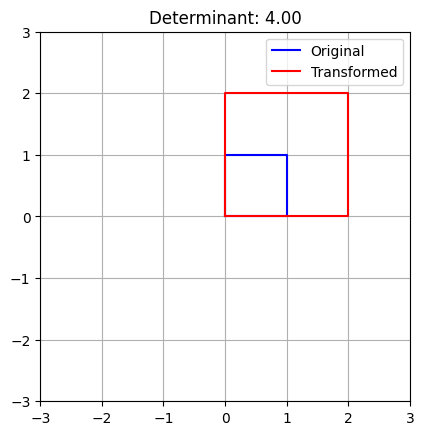

Original area:  1
Transformed area:  4.0


In [73]:
def plot_transformation(T, ax):
  square = np.array(
    [
      [0, 0],
      [1, 0],
      [1, 1],
      [0, 1],
      [0, 0]
    ]
  )
  
  transformed_square = square @ T.T
  
  # Plot original and transformed squares
  ax.plot(square[:, 0], square[:, 1], 'b-', label='Original')
  ax.plot(transformed_square[:, 0], transformed_square[:, 1], 'r-', label='Transformed')
  ax.legend()
  ax.set_xlim(-3, 3)
  ax.set_ylim(-3, 3)
  ax.grid()
  ax.set_aspect('equal')

  # Calculate determinant
  det = np.linalg.det(T)
  ax.set_title(f'Determinant: {det:.2f}')

# Define a scaling matrix with K = 4
k_factor = 4
scaling = np.array(
  [
    [np.sqrt(k_factor), 0],
    [0, np.sqrt(k_factor)]
  ]
)

fig, ax = plt.subplots()
plot_transformation(scaling, ax)
plt.show()

# Compute the area before and after the transformation
original_area = 1 * 1  # Area of unit square
transformed_area = original_area * np.linalg.det(scaling)

print("Original area: ", original_area)
print("Transformed area: ", transformed_area)

#### Explanation

- **Original Area:** The area of the unit square before transformation is $1 \times 1 = 1$

- **Transformed Area:** The determinant of the scaling matrix $scaling$ is $original\_area \times det(scaling)$. For $k\_factor = 4$, the transformed area is $1 \times 4 = 4$

### This is a basis in 3D. With the corresponding vectors (At figure) i, j, k; define the following transformations as Python functions. You provide the function with the angle parameter $\theta$ and it returns the transformation

- Rotation by $\theta$ degrees on $x$ axis
- Rotation by $\theta$ degrees on $y$ axis
- Rotation by $\theta$ degrees on $z$ axis

<div align="center">

![Task 4](./.assets/task_4.png)

</div>

We'll need to use transformation matrices for rotating vectors around each axis. Let's start by defining the rotation matrices for each axis

##### Rotation around the x-axis

$$
\begin{bmatrix}
  1 & 0 & 0\\
  0 & \cos{(\theta)} & -\sin{(\theta)}\\
  0 & \sin{(\theta)} & \cos{(\theta)}
\end{bmatrix}
$$

##### Rotation around the y-axis

$$
\begin{bmatrix}
  \cos{(\theta)} & 0 & \sin{(\theta)}\\
  0 & 1 & 0\\
  -\sin{(\theta)} & 0 & \cos{(\theta)}
\end{bmatrix}
$$

##### Rotation around the z-axis

$$
\begin{bmatrix}
  \cos{(\theta)} & -\sin{(\theta)} & 0\\
  \sin{(\theta)} & \cos{(\theta)} & 0\\
  0 & 0 & 1
\end{bmatrix}
$$

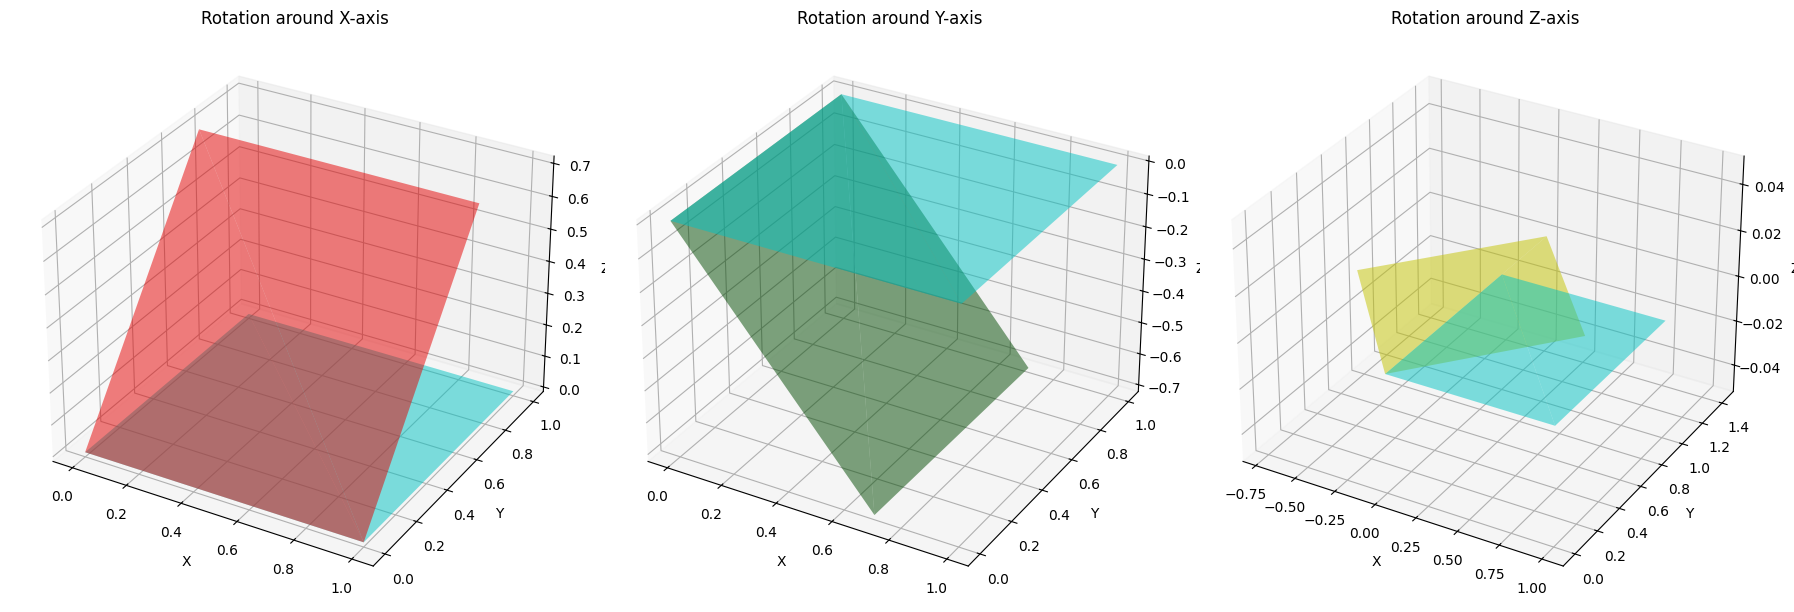

In [74]:
"""
Rotational functions
"""

def rotate_x(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [1, 0, 0],
      [0, np.cos(theta_rad), -np.sin(theta_rad)],
      [0, np.sin(theta_rad), np.cos(theta_rad)]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)

def rotate_y(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [np.cos(theta_rad), 0, np.sin(theta_rad)],
      [0, 1, 0],
      [-np.sin(theta_rad), 0, np.cos(theta_rad)]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)

def rotate_z(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [np.cos(theta_rad), -np.sin(theta_rad), 0],
      [np.sin(theta_rad), np.cos(theta_rad), 0],
      [0, 0, 1]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)

"""
Setting up for planes
"""

# Create a plane (A square in the XY plane)
plane = np.array(
  [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0]
  ]
)

# Angle in degrees
theta = 45

rotated_plane_x = rotate_x(plane, theta)
rotated_plane_y = rotate_y(plane, theta)
rotated_plane_z = rotate_z(plane, theta)

"""
Plotting
"""

fig = plt.figure(figsize=(18, 6))

# Plot for rotation around x-axis
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_trisurf(plane[:, 0], plane[:, 1], plane[:, 2], color='cyan', alpha=0.5)
ax1.plot_trisurf(rotated_plane_x[:, 0], rotated_plane_x[:, 1], rotated_plane_x[:, 2], color='red', alpha=0.5)
ax1.set_title('Rotation around X-axis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot for rotation around y-axis
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_trisurf(plane[:, 0], plane[:, 1], plane[:, 2], color='cyan', alpha=0.5)
ax2.plot_trisurf(rotated_plane_y[:, 0], rotated_plane_y[:, 1], rotated_plane_y[:, 2], color='green', alpha=0.5)
ax2.set_title('Rotation around Y-axis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot for rotation around z-axis
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_trisurf(plane[:, 0], plane[:, 1], plane[:, 2], color='cyan', alpha=0.5)
ax3.plot_trisurf(rotated_plane_z[:, 0], rotated_plane_z[:, 1], rotated_plane_z[:, 2], color='yellow', alpha=0.5)
ax3.set_title('Rotation around Z-axis')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Now provide a function that given 3 arguments representing angles on $x$, $y$ and $z$ respectively returns a combined transformation. Try it with different vectors and confirm your results

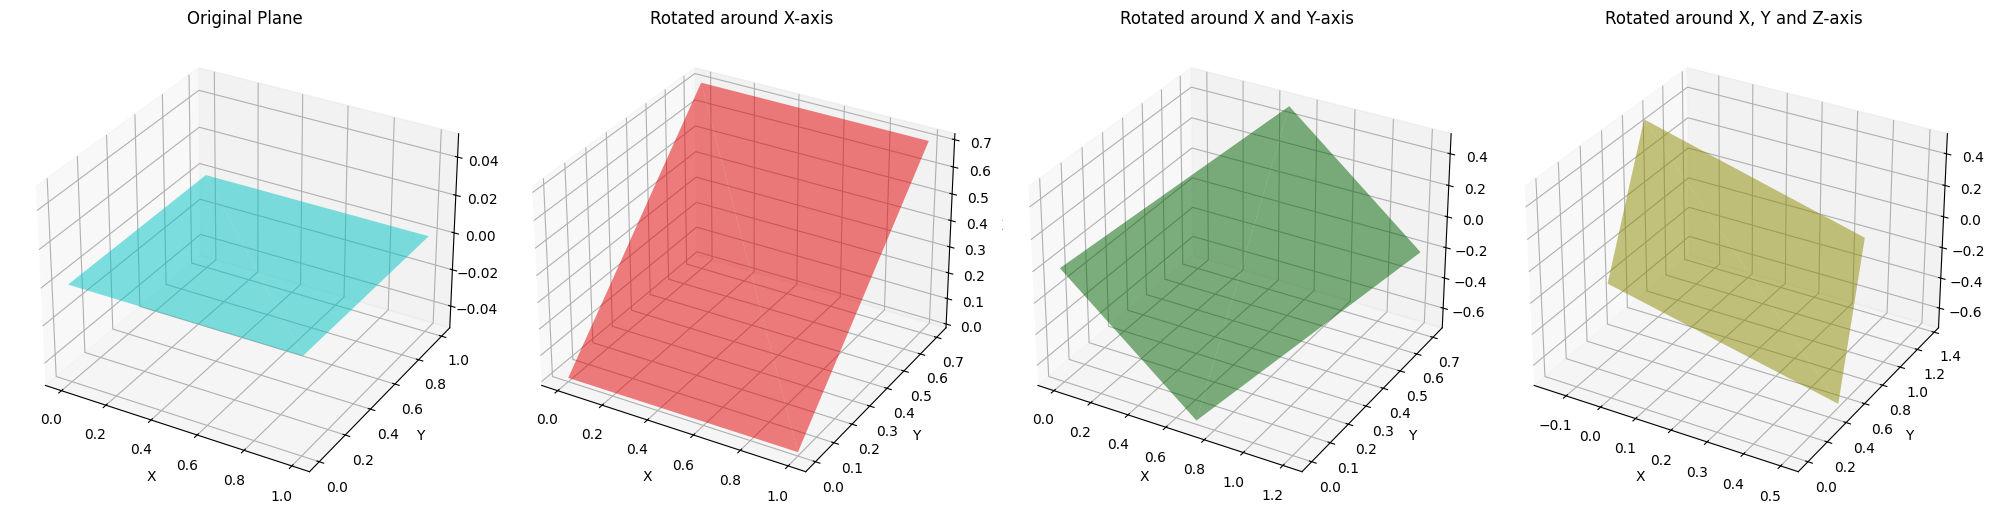

In [42]:
"""
Rotational functions
"""

def rotate_x(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [1, 0, 0],
      [0, np.cos(theta_rad), -np.sin(theta_rad)],
      [0, np.sin(theta_rad), np.cos(theta_rad)]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)

def rotate_y(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [np.cos(theta_rad), 0, np.sin(theta_rad)],
      [0, 1, 0],
      [-np.sin(theta_rad), 0, np.cos(theta_rad)]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)

def rotate_z(points, theta):
  theta_rad = np.radians(theta)
  rotation_matrix = np.array(
    [
      [np.cos(theta_rad), -np.sin(theta_rad), 0],
      [np.sin(theta_rad), np.cos(theta_rad), 0],
      [0, 0, 1]
    ]
  )
  
  return np.dot(points, rotation_matrix.T)


"""
Setting up for planes
"""

# Create a plane (A square in the XY plane)
plane = np.array(
  [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0]
  ]
)

# Angles in degrees
theta_x = 45  # rotation around x-axis
theta_y = 45  # rotation around y-axis
theta_z = 45  # rotation around z-axis

# Apply rotations
plane_rotated_x = rotate_x(plane, theta_x)
plane_rotated_xy = rotate_y(plane_rotated_x, theta_y)
plane_rotated_xyz = rotate_z(plane_rotated_xy, theta_z)

"""
Plotting
"""

fig = plt.figure(figsize=(20, 5))

# Original plane
ax1 = fig.add_subplot(141, projection='3d')
ax1.plot_trisurf(plane[:, 0], plane[:, 1], plane[:, 2], color='cyan', alpha=0.5)
ax1.set_title('Original Plane')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Rotated around x-axis
ax2 = fig.add_subplot(142, projection='3d')
ax2.plot_trisurf(plane_rotated_x[:, 0], plane_rotated_x[:, 1], plane_rotated_x[:, 2], color='red', alpha=0.5)
ax2.set_title('Rotated around X-axis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Rotated around x-axis and y-axis
ax3 = fig.add_subplot(143, projection='3d')
ax3.plot_trisurf(plane_rotated_xy[:, 0], plane_rotated_xy[:, 1], plane_rotated_xy[:, 2], color='green', alpha=0.5)
ax3.set_title('Rotated around X and Y-axis')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Rotated around x-axis, y-axis, and z-axis
ax4 = fig.add_subplot(144, projection='3d')
ax4.plot_trisurf(plane_rotated_xyz[:, 0], plane_rotated_xyz[:, 1], plane_rotated_xyz[:, 2], color='yellow', alpha=0.5)
ax4.set_title('Rotated around X, Y and Z-axis')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.tight_layout()
plt.show()


### Provide a different  transformation and confirm that what returned function of point 5 has always zero determinant

- When the determinant of a transformation matrix is zero, it means that the transformation collapses the space into a lower dimension. See the scaling transformation

- When a transformation matrix has a determinant of 1, it indicates that the transformation preserves the volume of the space. See the combined transformation

In [58]:
def combined_rotation_matrix(theta_x, theta_y, theta_z):
  theta_x_rad = np.radians(theta_x)
  theta_y_rad = np.radians(theta_y)
  theta_z_rad = np.radians(theta_z)
  
  rotation_on_x = np.array(
    [
      [1, 0, 0],
      [0, np.cos(theta_x_rad), -np.sin(theta_x_rad)],
      [0, np.sin(theta_x_rad), np.cos(theta_x_rad)]
    ]
  )

  rotation_on_y = np.array(
    [
      [np.cos(theta_y_rad), 0, np.sin(theta_y_rad)],
      [0, 1, 0],
      [-np.sin(theta_y_rad), 0, np.cos(theta_y_rad)]
    ]
  )
  
  rotation_on_z = np.array(
    [
      [np.cos(theta_z_rad), -np.sin(theta_z_rad), 0],
      [np.sin(theta_z_rad), np.cos(theta_z_rad), 0],
      [0, 0, 1]
    ]
  )
  
  rotated_matrix = rotation_on_z @ rotation_on_y @ rotation_on_x
  return rotated_matrix

combined_rotation = combined_rotation_matrix(
  theta_x=30, 
  theta_y=45, 
  theta_z=60
)

"""
Rotation transformation matrix and its determinant
"""

print("Combined Rotation Matrix:\n")
for data in combined_rotation:
  for item in data:
    print("\t", item, end="")
  print()

print("\nDeterminant of Combined Rotation Matrix:\n", np.linalg.det(combined_rotation))


Combined Rotation Matrix:

	 0.35355339059327384	 -0.5732233047033631	 0.7391989197401165
	 0.6123724356957946	 0.7391989197401166	 0.28033008588991065
	 -0.7071067811865475	 0.35355339059327373	 0.6123724356957946

Determinant of Combined Rotation Matrix:
 1.0


In [57]:
def scaling_transformation(sx, sy, sz):
  scaled = np.array(
    [
      [sx, 0, 0],
      [0, sy, 0],
      [0, 0, sz]
    ]
  )
  
  return scaled

scaling_matrix = scaling_transformation(sx=1, sy=1, sz=0)

"""
Scaling transformation matrix and its determinant
"""

print("Scaling Transformation Matrix:\n")
for data in scaling_matrix:
  print (data)

print("\nDeterminant of Scaling Transformation Matrix:\n", np.linalg.det(scaling_matrix))


Scaling Transformation Matrix:

[1 0 0]
[0 1 0]
[0 0 0]

Determinant of Scaling Transformation Matrix:
 0.0


### Provide a transformation that takes any vector of the 3D space and projects it to the light-blue plane. Compute the determinant

<div align="center">

![Task 7](./.assets/task_7.png)

</div>

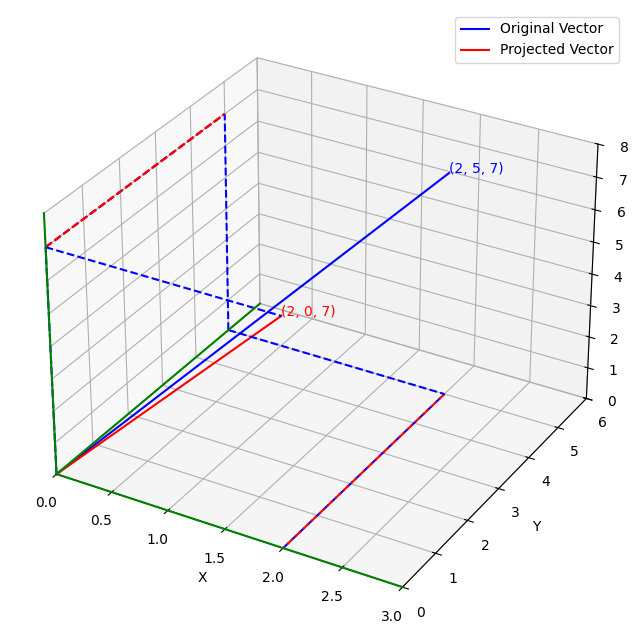

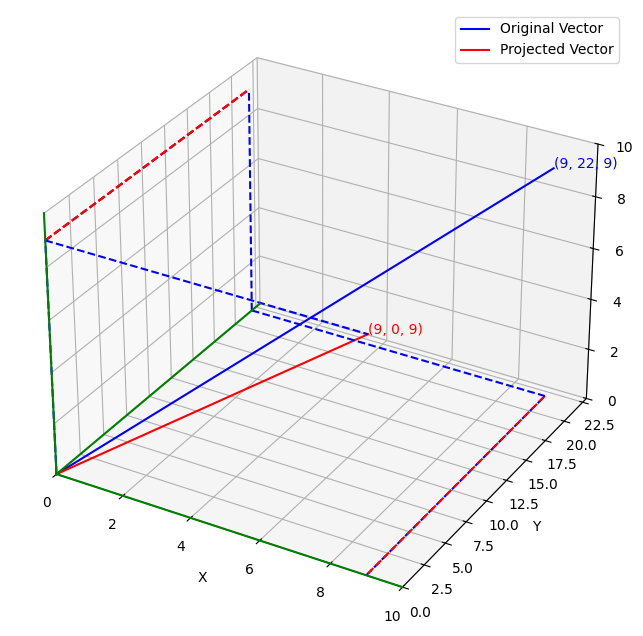

In [105]:
def plot_projection(x, y, z):
  projection_matrix = np.array(
    [
      [1, 0, 0],
      [0, 0, 0],
      [0, 0, 1]
    ]
  )
  
  vector_3d = np.array([x, y, z])
  v_projected = np.dot(projection_matrix, vector_3d)
  
  """
  Plotting set up
  """
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111, projection='3d')
  
  """
  Plotting original vector & projection
  """
  
  # Plot the original vector with annotations
  ax.plot([0, vector_3d[0]], [0, vector_3d[1]], [0, vector_3d[2]], color='b', label='Original Vector')
  ax.text(vector_3d[0], vector_3d[1], vector_3d[2], f'({vector_3d[0]}, {vector_3d[1]}, {vector_3d[2]})', color='b')

  # Plot the projected vector with annotations
  ax.plot([0, v_projected[0]], [0, v_projected[1]], [0, v_projected[2]], color='r', label='Projected Vector')
  ax.text(v_projected[0], v_projected[1], v_projected[2], f'({v_projected[0]}, {v_projected[1]}, {v_projected[2]})', color='r')

  # Plot lines from origin to projection on each axis
  ax.plot([vector_3d[0], vector_3d[0]], [0, vector_3d[1]], [0, 0], color='b', linestyle='--')
  ax.plot([v_projected[0], v_projected[0]], [vector_3d[1], v_projected[1]], [0, 0], color='r', linestyle='--')
  ax.plot([0, vector_3d[0]], [vector_3d[1], vector_3d[1]], [0, 0], color='b', linestyle='--')

  ax.plot([0, 0], [0, vector_3d[1]], [vector_3d[2], vector_3d[2]], color='b', linestyle='--')
  ax.plot([0, 0], [v_projected[1], vector_3d[1]], [vector_3d[2], vector_3d[2]], color='r', linestyle='--')
  ax.plot([0, 0], [vector_3d[1], vector_3d[1]], [0, vector_3d[2]], color='b', linestyle='--')

  ax.plot([0, 0], [0, 0], [0, vector_3d[2]], color='b', linestyle='--')
  ax.plot([0, 0], [0, vector_3d[1]], [v_projected[2], vector_3d[2]], color='r', linestyle='--')
  ax.plot([0, vector_3d[0]], [0, 0], [vector_3d[2], vector_3d[2]], color='b', linestyle='--')

  """
  Plot the x, y, z axes
  """
  ax.plot([0, max(vector_3d[0], v_projected[0]) + 1], [0, 0], [0, 0], 'g-')  # x-axis
  ax.plot([0, 0], [0, max(vector_3d[1], v_projected[1]) + 1], [0, 0], 'g-')  # y-axis
  ax.plot([0, 0], [0, 0], [0, max(v[2], v_projected[2]) + 1], 'g-')  # z-axis

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  ax.set_xlim(0, max(vector_3d[0], v_projected[0]) + 1)
  ax.set_ylim(0, max(vector_3d[1], v_projected[1]) + 1)
  ax.set_zlim(0, max(vector_3d[2], v_projected[2]) + 1)
  ax.legend()

  plt.show()

# Test the function with different coordinates
plot_projection(2, 5, 7)
plot_projection(9, 22, 9)


### Provide a transformation that takes any vector of the 3D space and takes it to the purple line. What is your conclusion about the determinant?

<div align="center">

![Task 8](./.assets/task_8.png)

</div>

Original vector: [2 3 4]
Projected vector onto y = x: [2.5 2.5 0. ]


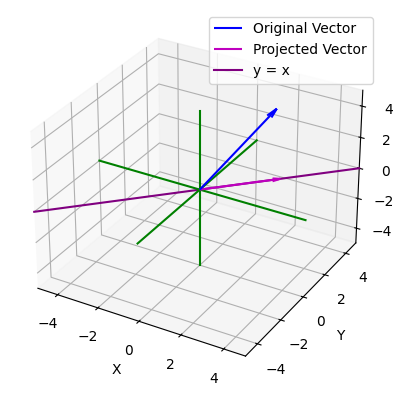

In [115]:
def project_onto_y_equals_x(vector):
  basis = np.array([[1], [1], [0]])
  projection_matrix = basis.dot(np.linalg.inv(basis.T.dot(basis))).dot(basis.T)
  projected_vector = projection_matrix.dot(vector)
  
  return projected_vector

def plot_projection(vector, projected_vector):
  """
  Plotting set up
  """
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  ax.quiver(0, 0, 0, vector[0], vector[1], vector[2], color='b', label='Original Vector', arrow_length_ratio=0.1)
  ax.quiver(0, 0, 0, projected_vector[0], projected_vector[1], projected_vector[2], color='m', label='Projected Vector', arrow_length_ratio=0.1)
  
  # Line y = x
  t = np.linspace(-5, 5, 100)
  x = t
  y = t
  z = np.zeros_like(t)
  ax.plot(x, y, z, color='purple', label='y = x')
  
  # Axes
  ax.plot([-5, 5], [0, 0], [0, 0], color='g')  # x-axis
  ax.plot([0, 0], [-5, 5], [0, 0], color='g')  # y-axis
  ax.plot([0, 0], [0, 0], [-5, 5], color='g')  # z-axis
  
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  
  ax.set_xlim([-5, 5])
  ax.set_ylim([-5, 5])
  ax.set_zlim([-5, 5])
  
  ax.legend()
  
  plt.show()

vector = np.array([2, 3, 4])
projected_vector = project_onto_y_equals_x(vector)

print("Original vector:", vector)
print("Projected vector onto y = x:", projected_vector)

plot_projection(vector, projected_vector)


##### Conclusion

**Reviewing the determinant description:** The determinant of the projection matrix will provide information about the scaling factor introduced by the transformation. If the determinant is zero, it means the transformation collapses a higher-dimensional space onto a lower-dimensional subspace, which is the case for a projection.

**Implication:** The determinant of the projection matrix will be $0$ because the projection collapses a higher-dimensional space (3D) onto a lower-dimensional subspace (the line $y=x$). This means that any vector projected onto the line $y=x$ will have a determinant of $0$.

### Provide a transformation of a vector in the 3D space and transform it to the vector $\vec{v} = ( 0, 0, k )$ for any constant $k$. Provide your conclusions on the determinant

In [133]:
def project_to_0_0_k(vector, k):
  transformation = np.array(
    [
      [0, 0, 0],
      [0, 0, 0],
      [0, 0, k]
    ]
  )
  
  projected_vector = transformation.dot(vector)
  
  return projected_vector, transformation

k = 5
vector = np.array([2, 3, 4])
projected_vector, transformation = project_to_0_0_k(vector, k)
determinant = np.linalg.det(transformation)

print("Original vector:", vector)
print("Projected vector onto (0, 0, k) with k =", k, ":", projected_vector)
print("Determinant of the transformation matrix:", determinant)


Original vector: [2 3 4]
Projected vector onto (0, 0, k) with k = 5 : [ 0  0 20]
Determinant of the transformation matrix: 0.0


#### Conclusion:

The determinant being zero indicates that the transformation is singular and non-invertible, which makes sense since projecting onto a lower-dimensional subspace (in this case, a single point) is a non-reversible operation

### Provide a transformation to accomplish the picture idea. Compare the determinant and provide your conclusions

<div align="center">

![Task 10](./.assets/task_10.png)

</div>

To provide a transformation that accomplishes the given mapping, we need to find a matrix $T$ such that:

$$
T \begin{bmatrix}
  0 \\
  2
\end{bmatrix} 
= \begin{bmatrix}
  -2 \\
  -2
\end{bmatrix} 
$$

$$
T \begin{bmatrix}
  3 \\
  0
\end{bmatrix} 
= \begin{bmatrix}
  2 \\
  -2
\end{bmatrix} 
$$

We can express the previous image as:

$$
V = \begin{bmatrix}
  0 \\
  2
\end{bmatrix} 
$$

$$
U = \begin{bmatrix}
  3 \\
  0
\end{bmatrix} 
$$

$$
A = \begin{bmatrix}
  -2 \\
  -2
\end{bmatrix} 
$$

$$
W = \begin{bmatrix}
  2 \\
  -2
\end{bmatrix} 
$$

The transformation matrix $T$ can be found by solving the system of linear equations:

For $V$

$$
T \begin{bmatrix}
  0 \\
  2
\end{bmatrix} 
= \begin{bmatrix}
  -2 \\
  -2
\end{bmatrix} 
$$

For $U$

$$
T \begin{bmatrix}
  3 \\
  0
\end{bmatrix} 
= \begin{bmatrix}
  2 \\
  -2
\end{bmatrix} 
$$

Hence we represent $T$ as:

$$
T = \begin{bmatrix}
  a & b \\
  c & d
\end{bmatrix}
$$

We can set up the following equations:

For $V$

$$
\begin{bmatrix}
  a & b \\
  c & d
\end{bmatrix}
\begin{bmatrix}
  0 \\
  2
\end{bmatrix} 
= \begin{bmatrix}
  -2 \\
  -2
\end{bmatrix} 
$$

$$
b \cdot 2 = -2 \rightarrow b = -1
$$

$$
d \cdot 2 = -2 \rightarrow d = -1
$$

For $U$

$$
\begin{bmatrix}
  a & b \\
  c & d
\end{bmatrix}
\begin{bmatrix}
  3 \\
  0
\end{bmatrix} 
= \begin{bmatrix}
  2 \\
  -2
\end{bmatrix} 
$$

$$
a \cdot 3 = 2 \rightarrow a = \frac{2}{2}
$$

$$
c \cdot 3 = -2 \rightarrow c = -\frac{2}{3}
$$

Therefore, the transformation matrix $T$ is:

$$
T = \begin{bmatrix}
  \frac{2}{3} & -1 \\
  -\frac{2}{3} & -1
\end{bmatrix}
$$

#### Implementation

In [135]:
# Define the transformation matrix
transformation_matrix = np.array(
  [
    [2/3, -1],
    [-2/3, -1]
  ]
)

# Defining the original vectors
vector_V = np.array([0, 2])
vector_U = np.array([3, 0])

# Applying the transformation
vector_A = transformation_matrix.dot(V)
vector_W = transformation_matrix.dot(U)

# Print the results
print("Original vector V:", vector_V)
print("Original vector U:", vector_U)
print("Transformed vector A:", vector_A)
print("Transformed vector W:", vector_W)

# Calculate the determinant of the transformation matrix
determinant = np.linalg.det(transformation_matrix)
print("Determinant of the transformation matrix:", determinant)


Original vector V: [0 2]
Original vector U: [3 0]
Transformed vector A: [-2. -2.]
Transformed vector W: [ 2. -2.]
Determinant of the transformation matrix: -1.3333333333333333


#### **Conclusion:**


The determinant of the transformation matrix $T$ is $-\frac{4}{3}$. This indicates that the transformation involves a combination of rotation and scaling. The negative sign suggests a reflection, and the magnitude $\frac{4}{3}$ indicates the scaling factor by which the area is scaled. In this case, the area of the parallelogram formed by the transformed vectors is $\frac{4}{3}$ times the area of the original parallelogram formed by the initial vectors